In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
data_train = pd.read_csv("train.csv")
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
X_train = data_train[["YearBuilt", "GarageArea", "PoolArea", "FullBath", "1stFlrSF", "2ndFlrSF"]].values
Y_train = data_train[["SalePrice"]].values

In [5]:
X_train.shape, Y_train.shape

((1460, 6), (1460, 1))

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(6, activation="sigmoid"),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(14, activation="tanh"),
    tf.keras.layers.Dense(1, activation="linear")   # because it is a regression problem
])

In [7]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='mse')

In [8]:
output = model.fit(X_train, Y_train, epochs=300)

Epoch 1/300
46/46 [==============================] - 1s 2ms/step - loss: 39036928000.0000
Epoch 2/300
46/46 [==============================] - 0s 2ms/step - loss: 39034142720.0000
Epoch 3/300
46/46 [==============================] - 0s 2ms/step - loss: 39031558144.0000
Epoch 4/300
46/46 [==============================] - 0s 2ms/step - loss: 39029014528.0000
Epoch 5/300
46/46 [==============================] - 0s 2ms/step - loss: 39026491392.0000
Epoch 6/300
46/46 [==============================] - 0s 2ms/step - loss: 39023960064.0000
Epoch 7/300
46/46 [==============================] - 0s 2ms/step - loss: 39021453312.0000
Epoch 8/300
46/46 [==============================] - 0s 2ms/step - loss: 39018950656.0000
Epoch 9/300
46/46 [==============================] - 0s 2ms/step - loss: 39016439808.0000
Epoch 10/300
46/46 [==============================] - 0s 2ms/step - loss: 39013937152.0000
Epoch 11/300
46/46 [==============================] - 0s 2ms/step - loss: 39011446784.0000
Epoch 12

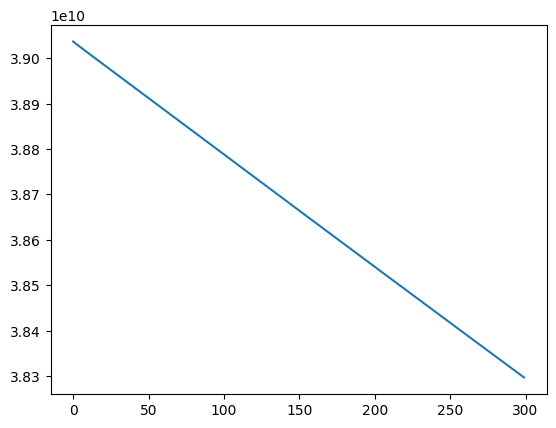

In [9]:
plt.plot(output.history["loss"])
plt.show()

In [10]:
data_test = pd.read_csv("test.csv")
data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [12]:
X_test = data_test[["YearBuilt", "GarageArea", "PoolArea", "FullBath", "1stFlrSF", "2ndFlrSF"]].values
Y_test = data_test[["SalePrice"]].values

KeyError: "None of [Index(['SalePrice'], dtype='object')] are in the [columns]"

In [ ]:
model.evaluate(X_test, Y_test)

In [13]:
my_house = np.array([[2016, 12, 0, 1, 110, 0]])
model.predict(my_house)

1/1 [==============================] - 0s 104ms/step


array([[2067.481]], dtype=float32)

In [15]:
model.save("/content/drive/MyDrive/my_model.h5")